In [5]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("data/data.csv")
print(df)

                                              text
0         Subject: Giảm giá đặc biệt dịp cuối năm!
1  Cảnh báo bảo mật hệ thống \n Vui lòng kiểm tra.
2                 Thông báo: Lịch bảo trì hệ thống


In [11]:
def clean_text(text):
    text = re . sub (r'^ Subject :\s*', '', text , flags = re . IGNORECASE )
    text = text . replace ('\r', ' ') . replace ('\n', ' ')
    text = re . sub (r'[^a-zA -ZÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂẾưăạảấầẩẫậắằẳẵặẹẻẽềềểếỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵýỷỹ\s]', '', text )
    text = text . lower ()
    text = re . sub (r'\s+', ' ', text ) . strip ()
    return text

df['cleaned'] = df['text']. astype ( str ) . apply ( clean_text )
print(df['cleaned'])
text = ' '. join ( df ['cleaned'])


0          subject: giảm giá đặc biệt dịp cuối năm!
1    cảnh báo bảo mật hệ thống n vui lòng kiểm tra.
2                  thông báo: lịch bảo trì hệ thống
Name: cleaned, dtype: object


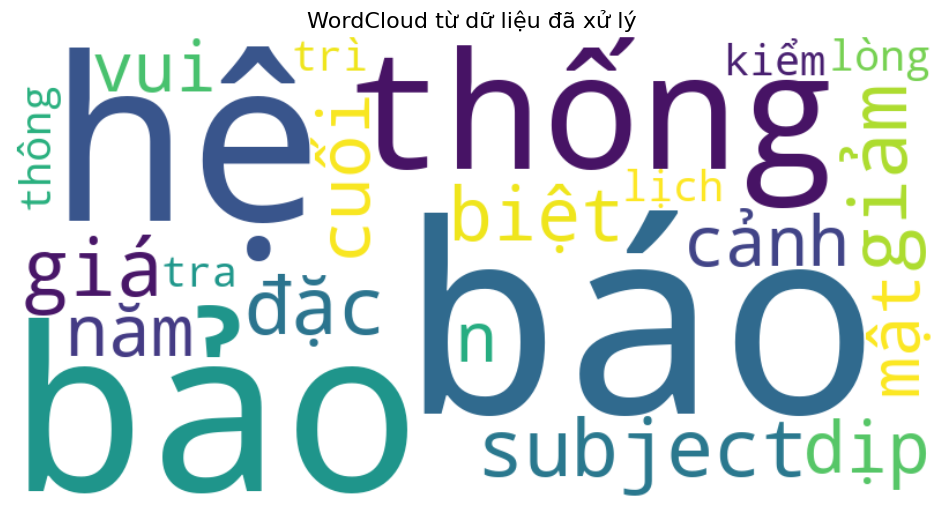

In [12]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud từ dữ liệu đã xử lý', fontsize=16)
plt.show()